Explained Variance Ratio: [0.76158591 0.20169267]


C:\Users\DAR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.67


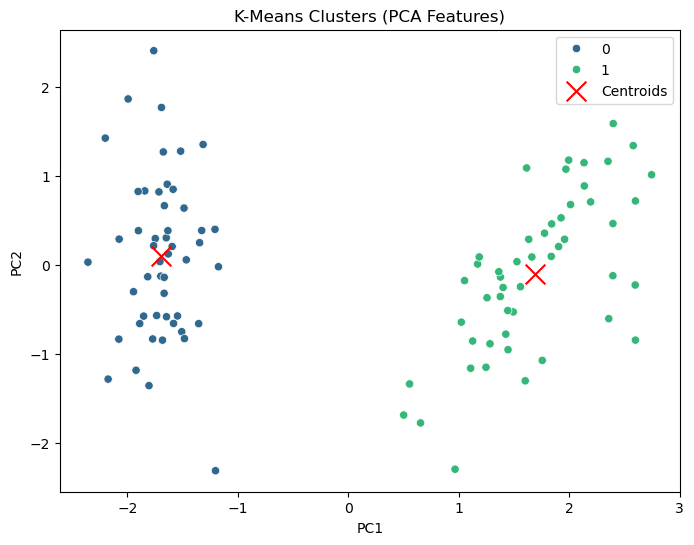

C:\Users\DAR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DAR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DAR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DAR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with M

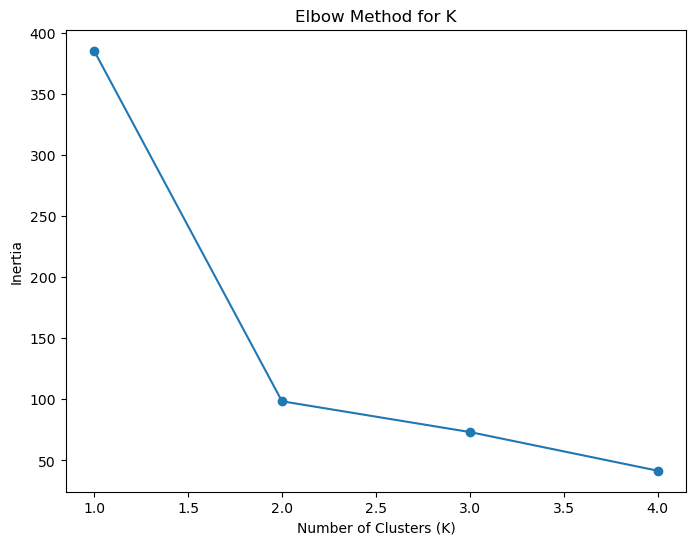

In [6]:
   import numpy as np
   import pandas as pd 
   from sklearn.datasets import load_iris
   from sklearn.preprocessing import StandardScaler
   from sklearn.decomposition import PCA
   from sklearn.cluster import KMeans
   from sklearn.metrics import silhouette_score
   import matplotlib.pyplot as plt
   import seaborn as sns

   # Load Iris dataset (binary, like Day 6)
   iris = load_iris()
   X = iris.data[iris.target != 2]  # Classes 0, 1
   y = iris.target[iris.target != 2]

   # Preprocess (like PHP/MyAdmin)
   scaler = StandardScaler()
   X_scaled = scaler.fit_transform(X)

   # PCA (Day 6)
   pca = PCA(n_components=2)
   X_pca = pca.fit_transform(X_scaled)
   print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

   # K-Means Clustering
   kmeans = KMeans(n_clusters=2, random_state=42)
   clusters = kmeans.fit_predict(X_pca)
   score = silhouette_score(X_pca, clusters)
   print(f"Silhouette Score: {score:.2f}")

   # Visualize Clusters
   plt.figure(figsize=(8, 6))
   sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
   plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
   plt.title('K-Means Clusters (PCA Features)')
   plt.xlabel('PC1')
   plt.ylabel('PC2')
   plt.legend()
   plt.show()

   # Elbow Method (pick K)
   inertias = []
   for k in range(1, 5):
       kmeans = KMeans(n_clusters=k, random_state=42)
       kmeans.fit(X_pca)
       inertias.append(kmeans.inertia_)
   plt.figure(figsize=(8, 6))
   plt.plot(range(1, 5), inertias, marker='o')
   plt.title('Elbow Method for K')
   plt.xlabel('Number of Clusters (K)')
   plt.ylabel('Inertia')
   plt.show()